# Set up

## Introduction 

**What is micro business?**
- A micro business is a business that has fewer than 10 employees, including the business founder, or is run by a single owner as a sole proprietorship. It requires less than \$50,000 start capital.

- This is general definition as some states can have their own, like in Vermont where microbusiness has to employ less than 5 people and has less than $25,000 in annual revenue. 

- Some typical microbusiness : 
    - IT specialist (freelancers)
    - Business consultant
    - Insurance/mortgage advisor 
    - Wedding photographers/musicians 
    
- It's important not to confuse microbusinesses with small businesses which are defined diferrently based on the industry but in term of number of employees these are hundreds of people and milions in annual revenue.

**Then, why is it so important?**

- It is an indicator of economic health and freedom.
    - If people are keen to start opening their businesses it means that the law and taxation support them.
    -  This gives people the possibility to make for living on their terms and to realise their ideas for business.
    
    - This sparks creativity and introduces to the market new products and services, contributing to the overall country's well-being.

## libraries

In [1]:
import os 
import warnings 
import requests 

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt 
import json 

import plotly.express as px 

from urllib.request import urlopen 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

In [34]:
init_notebook_mode(connected=True)

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set_theme(style="whitegrid")

In [3]:
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("seaborn version:", sns.__version__)
print("matplotlib version:", matplotlib.__version__)

numpy version: 1.19.2
pandas version: 1.4.2
seaborn version: 0.11.0
matplotlib version: 3.5.3


# EDA

## Data Preparation

**reading training data**

In [4]:
train_raw = pd.read_csv('dataset/train.csv')
train_raw.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [5]:
train_raw.dtypes

row_id                    object
cfips                      int64
county                    object
state                     object
first_day_of_month        object
microbusiness_density    float64
active                     int64
dtype: object

**completion of data**

There are 50 states + District of Columbia and 3,143 counties.

In [6]:
train_raw['state'].nunique()

51

In [7]:
print('# of states : ', train_raw['state'].nunique())
print('# of counties : ', train_raw['cfips'].nunique())
print('# of counties(using county columns) : ', train_raw['county'].nunique())

# of states :  51
# of counties :  3135
# of counties(using county columns) :  1871


Counties' names are not unique, so it is better to use cfips instead of county. Only after combining the state and the county we can identify the region.

No all counties are in the dataset.
- It seems that over years there were some changes to the number of counties, some were deleted while others created. 

**The number of counties per state.**

In [8]:
train_raw[['state', 'cfips']].drop_duplicates(subset = ['cfips'])

,state,cfips
0,Alabama,1001
39,Alabama,1003
78,Alabama,1005
117,Alabama,1007
156,Alabama,1009
...,...,...
122070,Wyoming,56037
122109,Wyoming,56039
122148,Wyoming,56041
122187,Wyoming,56043


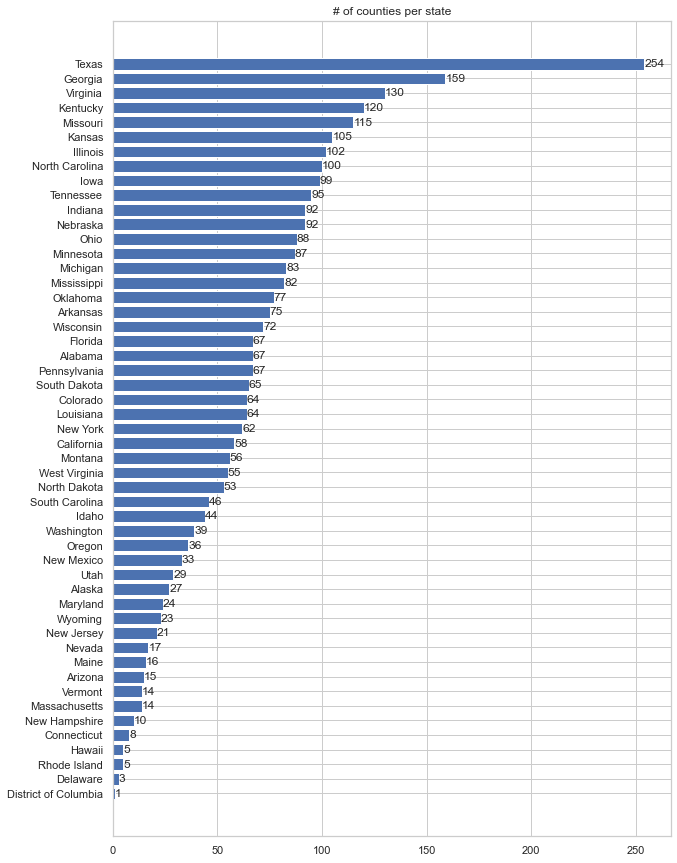

In [35]:
st_cfips = train_raw[['state', 'cfips']].drop_duplicates(subset = ['cfips']).groupby('state').size().sort_values()

fig, ax = plt.subplots(figsize = (10, 15))
bars = ax.barh(st_cfips.index, st_cfips.values)
ax.bar_label(bars)
ax.set_title('# of counties per state')
plt.show()

## Distribution of target variable (county level)

In [23]:
train_raw.groupby('cfips').mean().reset_index()

,cfips,microbusiness_density,active
0,1001,3.164535,1331.717949
1,1003,7.889811,13064.538462
2,1005,1.102521,222.102564
3,1007,1.270834,226.769231
4,1009,1.676951,742.230769
...,...,...,...
3130,56037,3.119993,1003.641026
3131,56039,26.337935,4953.538462
3132,56041,3.946930,573.666667
3133,56043,2.904894,177.410256


In [24]:
cfips_county_state = train_raw[['cfips', 'county', 'state']].drop_duplicates()
counties_mean = train_raw.groupby('cfips').mean().reset_index()
counties_mean = counties_mean.merge(cfips_county_state, on = 'cfips', how = 'inner')
counties_mean.head()

,cfips,microbusiness_density,active,county,state
0,1001,3.164535,1331.717949,Autauga County,Alabama
1,1003,7.889811,13064.538462,Baldwin County,Alabama
2,1005,1.102521,222.102564,Barbour County,Alabama
3,1007,1.270834,226.769231,Bibb County,Alabama
4,1009,1.676951,742.230769,Blount County,Alabama


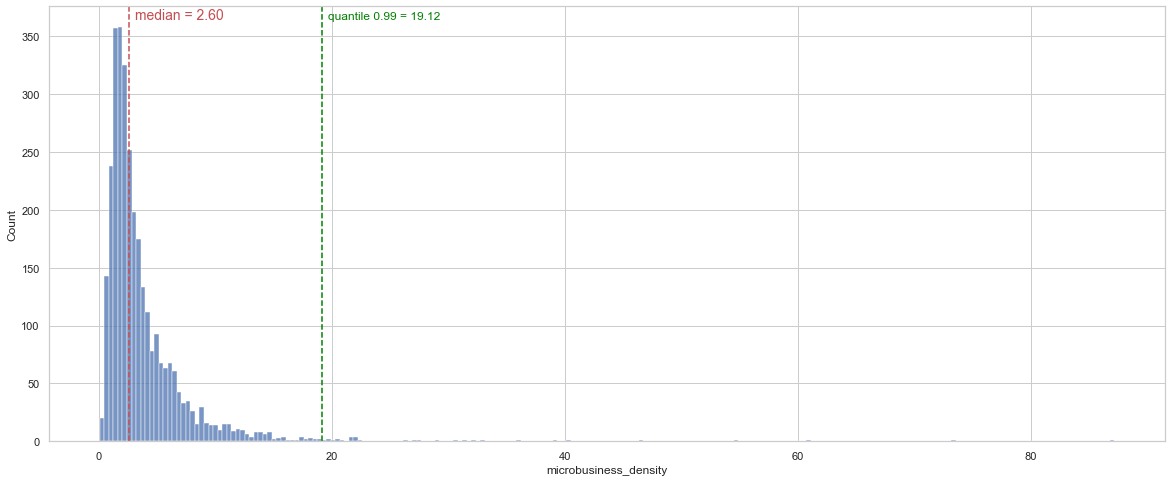

In [36]:
fig, ax = plt.subplots(figsize = (20, 8))

sns.histplot(x = 'microbusiness_density', 
             data = counties_mean, 
             ax = ax) 

raw_median = counties_mean['microbusiness_density'].median()
ax.axvline(raw_median, 0, c = 'r', ls = '--')
ax.text(raw_median+0.5, 365, f'median = {raw_median:.2f}', 
        size = 14, horizontalalignment = 'left', c = 'r')

q99 = counties_mean['microbusiness_density'].quantile(0.99)
ax.axvline(q99, 0, c = 'green', ls = '--')
ax.text(q99+0.5, 365, f'quantile 0.99 = {q99:.2f}', c = 'green')

plt.show()

왜도가 아주 큰 것을 알 수 있다. 두 부분을 나눠서 살펴보자. 
- main body(below 0.99 quantile)
- tail(above 0.99 quantile)
    - 인구 수에 비해서 microbusiness의 수가 아주 많다는 의미이다.

- 가장 인구 수가 많은 county는 Los Angeles County in California
    - about 9,800,000 people
- 가장 인구 수가 적은 county는 Loving County in Texas
    - about 617 people 
- 평균 인구 수는 102,000

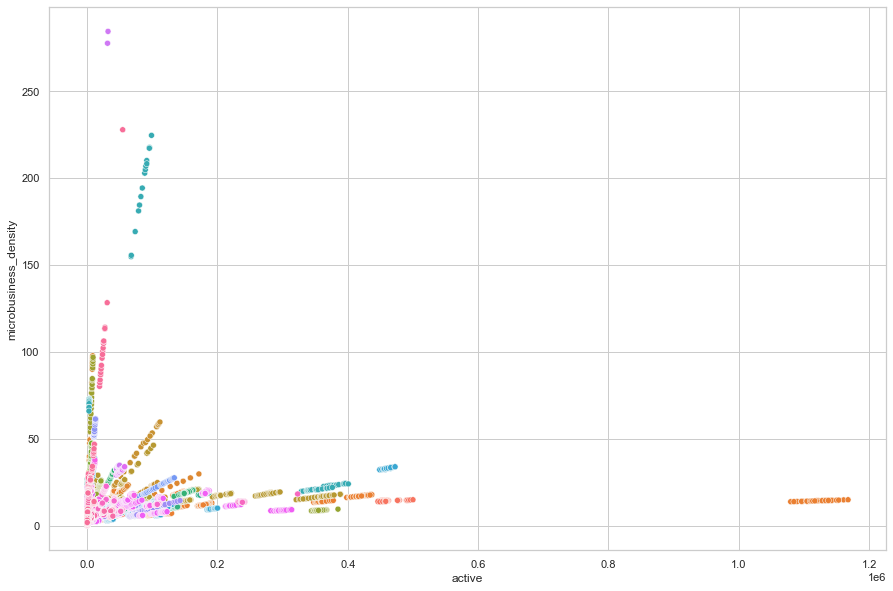

In [44]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.scatterplot(x = 'active', y = 'microbusiness_density', 
                data = train_raw, ax = ax, hue = 'state', legend = False)
plt.show()

In [49]:
tail = counties_mean[counties_mean['microbusiness_density'] > q99]
print(f'# of counties in the tail : {len(tail)}\n')
print(tail.sort_values(by = 'microbusiness_density', ascending = False)[:10])

# of counties in the tail : 32

      cfips  microbusiness_density         active             county         state
1760  32510              87.196625   38078.384615        Carson City        Nevada
3128  56033              73.510410   17455.794872    Sheridan County       Wyoming
295    8105              60.942899    5305.948718  Rio Grande County      Colorado
2235  41061              54.522958   11141.538462       Union County        Oregon
559   16021              46.730638    4276.282051    Boundary County         Idaho
1752  32017              40.140351    1695.589744     Lincoln County        Nevada
837   19101              39.112656    5803.230769   Jefferson County          Iowa
2794  49043              35.871770   11004.333333      Summit County          Utah
1855  36061              32.892037  460102.051282    New York County      New York
2407  46099              32.261295   45412.897436   Minnehaha County  South Dakota


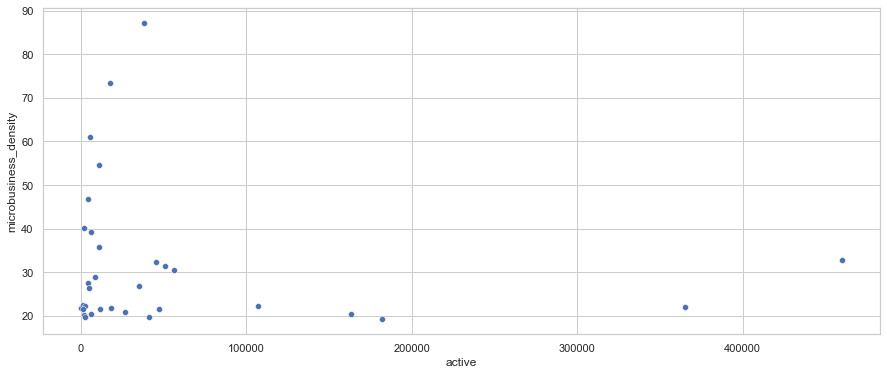

In [64]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6)) 
sns.scatterplot(x = 'active', y = 'microbusiness_density', 
                data = counties_mean[counties_mean['microbusiness_density'] > q99],
                ax = ax, legend = False)
plt.show()

Carson City에 대해서 더 깊이 탐색

In [67]:
pd.to_datetime(train_raw['first_day_of_month']).dt.to_period('M')

0         2019-08
1         2019-09
2         2019-10
3         2019-11
4         2019-12
           ...   
122260    2022-06
122261    2022-07
122262    2022-08
122263    2022-09
122264    2022-10
Name: first_day_of_month, Length: 122265, dtype: period[M]

In [80]:
tmp = train_raw[train_raw['cfips'] == 32510]['microbusiness_density'].max()

In [87]:
tmp_data = train_raw[train_raw['cfips'] == 32510]

In [88]:
tmp_data[tmp_data['microbusiness_density'] == tmp]['date']

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
68673,32510_2022-05-01,32510,Carson City,Nevada,2022-05-01,224.53825,98716


In [93]:
def show_county(cfips, txt_off = 5) : 
    county_data = train_raw[train_raw['cfips'] == cfips]
    county_data['date'] = pd.to_datetime(county_data['first_day_of_month']).dt.to_period('M')
    county_data['date'] = county_data['date'].astype(str)
    
    fig, ax = plt.subplots(figsize = (20, 7)) 
    sns.lineplot(x = 'date', y = 'microbusiness_density', 
                 data = county_data)
    
    first_pt = (county_data['date'].iloc[0], county_data['microbusiness_density'].iloc[0])
    plt.scatter(first_pt[0], first_pt[1])
    plt.text(first_pt[0], first_pt[1] + txt_off, round(first_pt[1], 1), 
             ha = 'center', va = 'bottom')
    
    max_data = county_data['microbusiness_density'].max()
    max_pt = (county_data[county_data['microbusiness_density'] == max_data]['date'].iloc[0],
              county_data[county_data['microbusiness_density'] == max_data]['microbusiness_density'].iloc[0])
    plt.scatter(max_pt[0], max_pt[1])
    plt.text(max_pt[0], max_pt[1] + txt_off, round(max_pt[1], 1), 
             ha = 'center', va = 'bottom')
    
    
    plt.title(f"{county_data['county'].iloc[0]}, {county_data['state'].iloc[0]}")
    plt.xticks(rotation = 90, ha = 'center')
    
    plt.show()

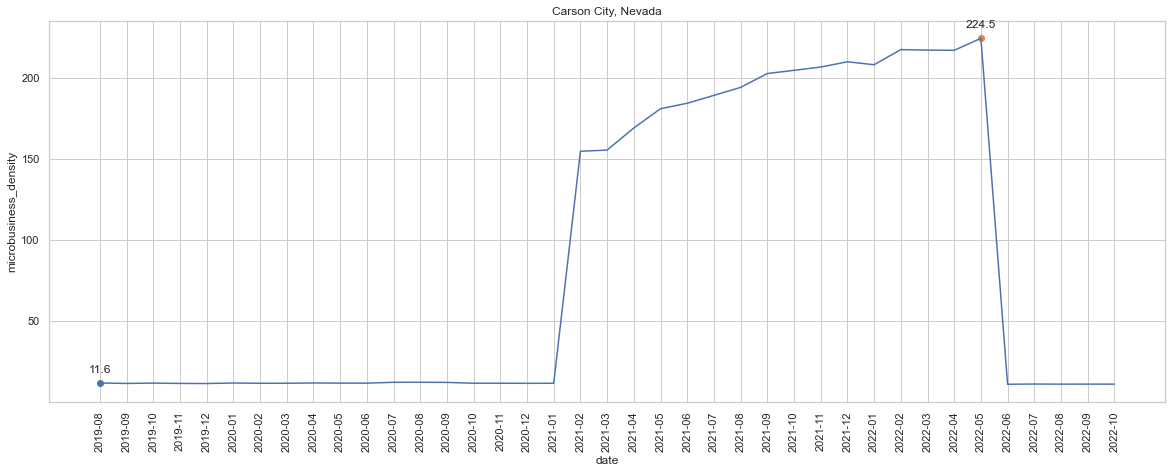

In [94]:
show_county(32510)